Best Fit Model (Degree 3):
Test MSE: 2.351580230532394


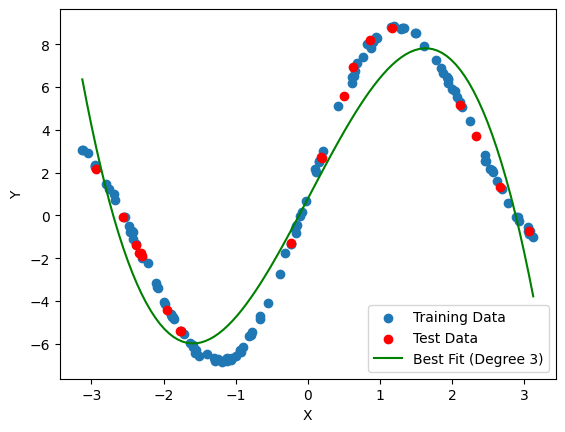

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the paths to the training and test data files
trainPath = "trainProject2.txt"
testPath = "testProject2.txt"

# Load the training and test data
train_data = pd.read_csv(trainPath, header=None, names=['X', 'Y'])
test_data = pd.read_csv(testPath, header=None, names=['X', 'Y'])


# Extract features (X) and target (Y) from the data
X_train = train_data[['X']].values
y_train = train_data['Y'].values
X_test = test_data[['X']].values
y_test = test_data['Y'].values

# Define a list of function depths (polynomial degrees) to test
function_depths = [1, 2, 3]
best_degree = None
best_model = None
best_test_mse = float('inf')

# Iterate through different function depths
for degree in function_depths:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error for test data
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Check if this model has the lowest test MSE
    if test_mse < best_test_mse:
        best_test_mse = test_mse
        best_degree = degree
        best_model = model

# Find the best model based on the lowest test MSE
print(f'Best Fit Model (Degree {best_degree}):')
print(f'Test MSE: {best_test_mse}')

# Plot the best-fit line
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = best_model.predict(X_range_poly)

plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(X_range, y_range_pred, label=f'Best Fit (Degree {best_degree})', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


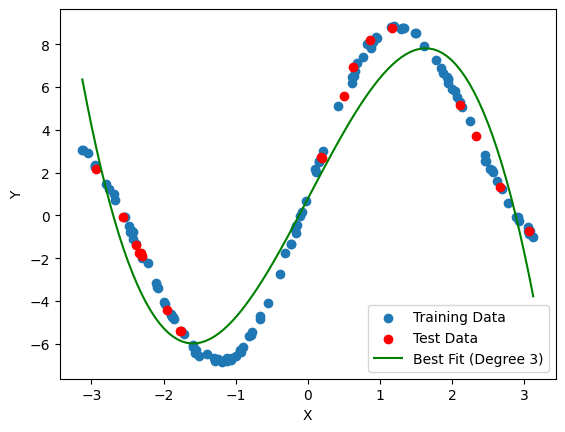

Best Fit Model (Degree 3):
Test MSE: 2.4590524799449693


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define the paths to the training and test data files
trainPath = "trainProject2.txt"
testPath = "testProject2.txt"

# Load the training and test data
train_data = np.loadtxt(trainPath, delimiter=',', skiprows=1)  # Assuming CSV format
test_data = np.loadtxt(testPath, delimiter=',', skiprows=1)    # Assuming CSV format

# Split the data into features (X) and target (Y)
X_train = train_data[:, 0].reshape(-1, 1)
y_train = train_data[:, 1]
X_test = test_data[:, 0].reshape(-1, 1)
y_test = test_data[:, 1]

# Custom polynomial regression model
def polynomial_regression(X, degree):
    X_poly = np.ones(X.shape)
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

def fit_linear_regression(X, y):
    return np.linalg.lstsq(X, y, rcond=None)[0]

def predict(X, coefficients):
    return np.dot(X, coefficients)

# Create a list of function depths (polynomial degrees) to test
model_degrees = [1, 2, 3]
best_fit = None
best_degree = None
best_test_mse = float('inf')

# Iterate through different function depths
for degree in model_degrees:
    X_train_poly = polynomial_regression(X_train, degree)
    X_test_poly = polynomial_regression(X_test, degree)

    coefficients = fit_linear_regression(X_train_poly, y_train)

    y_train_pred = predict(X_train_poly, coefficients)
    y_test_pred = predict(X_test_poly, coefficients)

    # Calculate mean squared error for training and test data
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Store the best model
    if test_mse < best_test_mse:
        best_test_mse = test_mse
        best_fit = coefficients
        best_degree = degree

# Plot the best-fit line and data points
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range_poly = polynomial_regression(X_range, best_degree)
y_range_pred = predict(X_range_poly, best_fit)

plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(X_range, y_range_pred, label=f'Best Fit (Degree {best_degree})', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Print the results
print(f'Best Fit Model (Degree {best_degree}):')
print(f'Test MSE: {best_test_mse}')


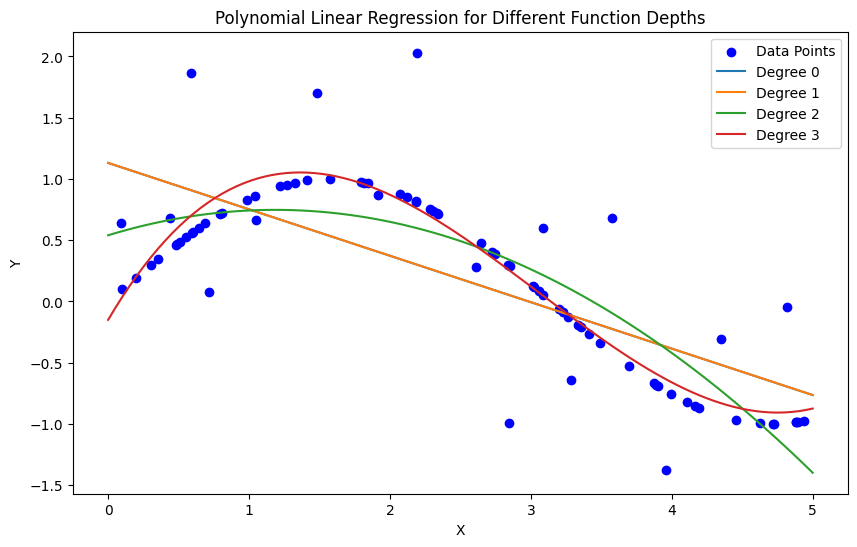

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate your dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Define a function for polynomial feature expansion
def create_poly_features(X, degree):
    if degree == 0:
        return X  # No transformation for degree 0
    poly_features = []
    for d in range(1, degree + 1):
        poly_features.append(X ** d)
    return np.column_stack(poly_features)

# Define a function to train a linear regression model
def train_linear_regression(X, y):
    X_bias = np.column_stack((np.ones(X.shape[0]), X))
    coefficients = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    return coefficients

# Define a function to make predictions using the trained model
def predict(X, coefficients):
    X_bias = np.column_stack((np.ones(X.shape[0]), X))
    predictions = X_bias @ coefficients
    return predictions

# Set the degrees for polynomial expansion
model_degrees = [0, 1, 2, 3]

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points', color='blue')

for degree in model_degrees:
    # Create polynomial features for the current degree
    X_poly = create_poly_features(X, degree)

    # Train the linear regression model
    coefficients = train_linear_regression(X_poly, y)

    # Generate predictions for plotting the fitted line
    X_range = np.linspace(0, 5, 100).reshape(-1, 1)
    X_range_poly = create_poly_features(X_range, degree)
    y_range_pred = predict(X_range_poly, coefficients)

    # Plot the best-fit line
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Linear Regression for Different Function Depths')
plt.show()


The best function depth is 0 with a test error of 0.688913316968466


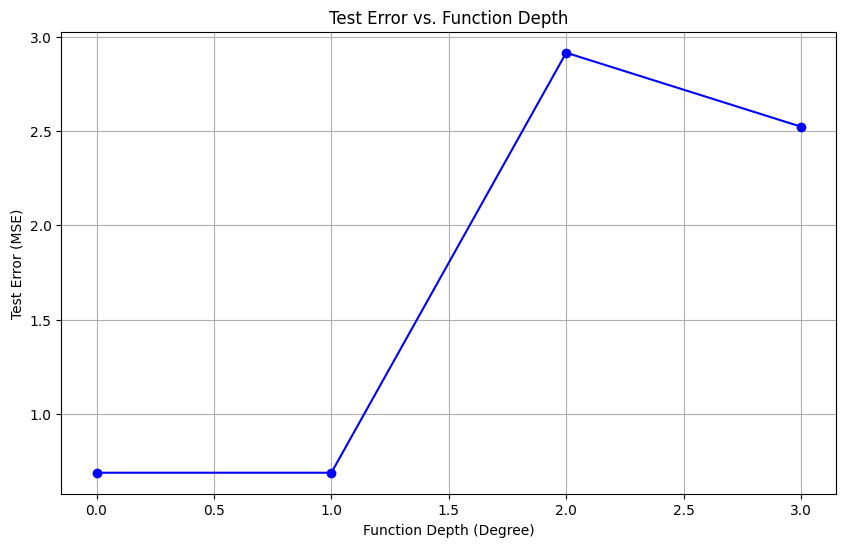

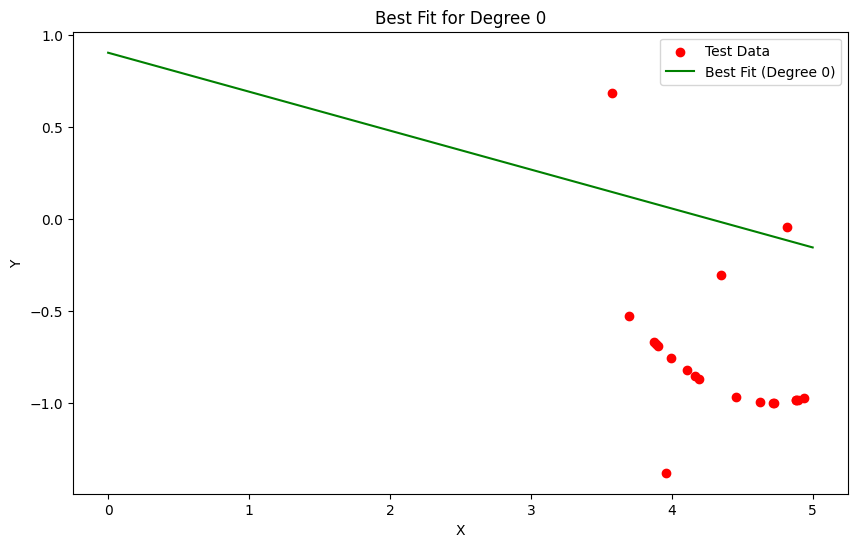

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate your dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Define a function for polynomial feature expansion
def create_poly_features(X, degree):
    if degree == 0:
        return X  # No transformation for degree 0
    poly_features = []
    for d in range(1, degree + 1):
        poly_features.append(X ** d)
    return np.column_stack(poly_features)

# Define a function to train a linear regression model
def train_linear_regression(X, y):
    X_bias = np.column_stack((np.ones(X.shape[0]), X))
    coefficients = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    return coefficients

# Define a function to make predictions using the trained model
def predict(X, coefficients):
    X_bias = np.column_stack((np.ones(X.shape[0]), X))
    predictions = X_bias @ coefficients
    return predictions

# Set the degrees for polynomial expansion
model_degrees = [0, 1, 2, 3]

# Split the data into training and test sets
X_train = X[:60]
y_train = y[:60]
X_test = X[60:]
y_test = y[60:]

# Initialize lists to store test errors and best-fit coefficients
test_errors = []
best_fit_coefficients = []

for degree in model_degrees:
    # Create polynomial features for the current degree
    X_poly = create_poly_features(X_train, degree)

    # Train the linear regression model
    coefficients = train_linear_regression(X_poly, y_train)

    # Generate predictions on the test data
    X_test_poly = create_poly_features(X_test, degree)
    y_test_pred = predict(X_test_poly, coefficients)

    # Calculate the test error (Mean Squared Error)
    test_error = np.mean((y_test - y_test_pred) ** 2)

    # Store the test error and coefficients
    test_errors.append(test_error)
    best_fit_coefficients.append(coefficients)

# Plot the test errors for different function depths
plt.figure(figsize=(10, 6))
plt.plot(model_degrees, test_errors, marker='o', linestyle='-', color='blue')
plt.xlabel('Function Depth (Degree)')
plt.ylabel('Test Error (MSE)')
plt.title('Test Error vs. Function Depth')
plt.grid(True)

# Determine the best function depth (lowest test error)
best_degree = model_degrees[np.argmin(test_errors)]

print(f"The best function depth is {best_degree} with a test error of {test_errors[model_degrees.index(best_degree)]}")

# Plot the best-fit line for the chosen degree
X_range = np.linspace(0, 5, 100).reshape(-1, 1)
X_range_poly = create_poly_features(X_range, best_degree)
best_fit_coeff = best_fit_coefficients[model_degrees.index(best_degree)]
y_range_pred = predict(X_range_poly, best_fit_coeff)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(X_range, y_range_pred, label=f'Best Fit (Degree {best_degree})', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Best Fit for Degree {best_degree}')
plt.show()
